In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sn
import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

In [3]:
df = pd.read_csv('result of Wholesale customers data clustering.csv')


In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Kmeans_labels,Cure_labels,Birch_labels
0,2,3,12669,9656,7561,214,2674,1338,0,0,2
1,2,3,7057,9810,9568,1762,3293,1776,1,0,2
2,2,3,6353,8808,7684,2405,3516,7844,0,0,2
3,1,3,13265,1196,4221,6404,507,1788,0,0,2
4,2,3,22615,5410,7198,3915,1777,5185,2,0,3


In [6]:
y = df.loc[:,'Cure_labels']
X = df.iloc[:,:8]
X.shape

(440, 8)

In [18]:
###### Devide data to test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


In [19]:
######## Decision Tree ########
### tree based methods for classification
# criterion = 'gini' or 'entropy'
tree_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model = tree_classifier.fit(X_train, y_train)
predict = tree_model.predict(X_test)

# import graphviz
# dot_data = tree.export_graphviz(tree_model, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("Autism",view=True)
names = list(df)
class_names = ['0', '1', '2', '3']

from IPython.display import Image
import pydotplus
#graphviz==> https://graphviz.gitlab.io/_pages/Download/Download_windows.html

dot_data = tree.export_graphviz(tree_classifier , out_file=None,
                                feature_names=names[3:],
                                class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Create pdf
graph.write_pdf("DT_Wholesale customers.pdf")

# Create PNG
graph.write_png("DT_Wholesale customers.png")


####Confusion matrix
cnf_matrix = metrics.confusion_matrix(predict,y_test )
print(cnf_matrix)
print(predict.shape,y_test.shape)
# plt.show()
plot_confusion_matrix_from_data(predict,y_test)

###Metrics
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print( "classification error is :", np.sum(predict != y_test) / len(y_test) )
# print("Precision:",metrics.precision_score(y_test, predict))
# print("Recall:",metrics.recall_score(y_test, predict))
# print("F_measure:",metrics.f1_score(y_test, predict))


[[86  1  0]
 [ 0  0  0]
 [ 1  0  0]]
(88,) (88,)


ValueError: Shape of passed values is (3, 3), indices imply (2, 2)

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


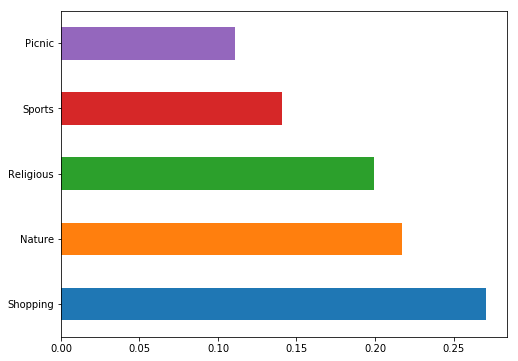

6

In [20]:
model = ExtraTreesClassifier()
model.fit(X,y)
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
feat_importances = pd.DataFrame(feat_importances.nlargest(20))


In [88]:
np.sum(y_test)

558